In [1]:
import time, datetime
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

In [2]:
df1 = pd.read_excel('./data/owid-covid-data.xlsx')

In [3]:
China,America,India= df1[df1['location'] == 'China'],df1[df1['location'] == 'United States'],df1[df1['location'] == 'India']
Japan,South_Africa,Israel = df1[df1['location'] == 'Japan'],df1[df1['location'] == 'South Africa'],df1[df1['location'] == 'Israel']
Germany,World = df1[df1['location'] == 'Germany'],df1[df1['location'] == 'World']

China,America,India = China.reset_index(),America.reset_index(),India.reset_index()
Japan,South_Africa,Israel = Japan.reset_index(),South_Africa.reset_index(),Israel.reset_index()
Germany,World = Germany.reset_index(),World.reset_index()

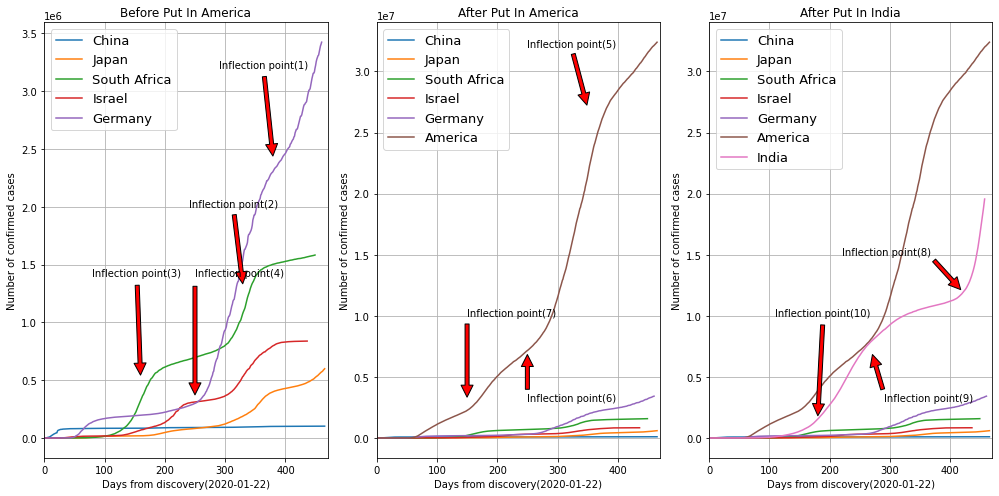

'\n0天:2020年1月22日\n100天:2020年5月1日\n200天:2020年8月9日\n300天:2020年8月9日\n400天:2020年11月17日\n500天:2021年2月25日\n'

In [4]:
'''
各国疫情累计确诊图
'''
fig, ax = plt.subplots(1,3,figsize=(14,7))
ax[0].plot(China.index,China['total_cases'],label='China')
# ax[0].plot(America.index,America['total_cases'],label='America')
# ax.plot(India.index,India['total_cases'],label='India')
ax[0].plot(Japan.index,Japan['total_cases'],label='Japan')
ax[0].plot(South_Africa.index,South_Africa['total_cases'],label='South Africa')
ax[0].plot(Israel.index,Israel['total_cases'],label='Israel')
ax[0].plot(Germany.index,Germany['total_cases'],label='Germany')
# ax.plot(World.index,World['total_cases'],label='World')
ax[0].set_title("Before Put In America")
ax[0].set_xlabel('Days from discovery(2020-01-22)')
ax[0].set_ylabel('Number of confirmed cases')
ax[0].legend(fontsize=13)
ax[0].grid(True)
ax[0].set_xlim((0, 470))
ax[0].annotate('Inflection point(1)', xy=(380,2.4e6), xytext=(290,3.2e6),
            arrowprops=dict(facecolor='r', shrink=0.05))
ax[0].annotate('Inflection point(2)', xy=(330,1.3e6), xytext=(240,2e6),
            arrowprops=dict(facecolor='r', shrink=0.05))
ax[0].annotate('Inflection point(3)', xy=(160,0.5e6), xytext=(80,1.4e6),
            arrowprops=dict(facecolor='r', shrink=0.05))
ax[0].annotate('Inflection point(4)', xy=(250,0.32e6), xytext=(250,1.4e6),
            arrowprops=dict(facecolor='r', shrink=0.05)) 

ax[1].plot(China.index,China['total_cases'],label='China')
ax[1].plot(Japan.index,Japan['total_cases'],label='Japan')
ax[1].plot(South_Africa.index,South_Africa['total_cases'],label='South Africa')
ax[1].plot(Israel.index,Israel['total_cases'],label='Israel')
ax[1].plot(Germany.index,Germany['total_cases'],label='Germany')
# ax.plot(World.index,World['total_cases'],label='World')
ax[1].plot(America.index,America['total_cases'],label='America')
ax[1].set_title("After Put In America")
ax[1].set_xlabel('Days from discovery(2020-01-22)')
ax[1].set_ylabel('Number of confirmed cases')
ax[1].legend(fontsize=13)
ax[1].grid(True)
ax[1].set_xlim((0, 470))
ax[1].annotate('Inflection point(5)', xy=(350,2.7e7), xytext=(250,3.2e7),
            arrowprops=dict(facecolor='r', shrink=0.05))
ax[1].annotate('Inflection point(6)', xy=(250,0.7e7), xytext=(250,0.3e7),
            arrowprops=dict(facecolor='r', shrink=0.05))
ax[1].annotate('Inflection point(7)', xy=(150,0.3e7), xytext=(150,1e7),
            arrowprops=dict(facecolor='r', shrink=0.05))


ax[2].plot(China.index,China['total_cases'],label='China')
ax[2].plot(Japan.index,Japan['total_cases'],label='Japan')
ax[2].plot(South_Africa.index,South_Africa['total_cases'],label='South Africa')
ax[2].plot(Israel.index,Israel['total_cases'],label='Israel')
ax[2].plot(Germany.index,Germany['total_cases'],label='Germany')
# ax.plot(World.index,World['total_cases'],label='World')
ax[2].plot(America.index,America['total_cases'],label='America')
ax[2].plot(India.index,India['total_cases'],label='India')
ax[2].set_title("After Put In India")
ax[2].set_xlabel('Days from discovery(2020-01-22)')
ax[2].set_ylabel('Number of confirmed cases')
ax[2].legend(fontsize=13)
ax[2].grid(True)
ax[2].set_xlim((0, 470))
ax[2].annotate('Inflection point(8)', xy=(420,1.2e7), xytext=(220,1.5e7),
            arrowprops=dict(facecolor='r', shrink=0.05))
ax[2].annotate('Inflection point(9)', xy=(270,0.7e7), xytext=(290,0.3e7),
            arrowprops=dict(facecolor='r', shrink=0.05))
ax[2].annotate('Inflection point(10)', xy=(180,0.14e7), xytext=(110,1e7),
            arrowprops=dict(facecolor='r', shrink=0.05))


plt.tight_layout()
plt.show()

'''
0天:2020年1月22日
100天:2020年5月1日
200天:2020年8月9日
300天:2020年8月9日
400天:2020年11月17日
500天:2021年2月25日
'''

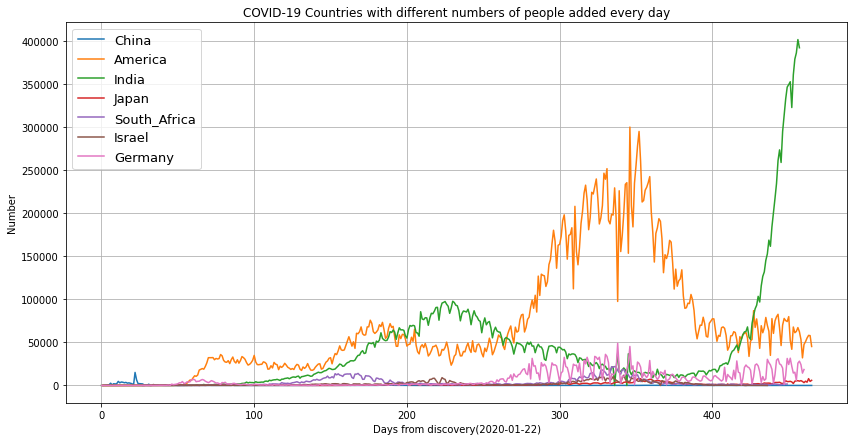

In [5]:
'''
各国疫情新增图
'''
tag = 'new_cases'
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(China.index,China[tag],label='China')
ax.plot(America.index,America[tag],label='America')
ax.plot(India.index,India[tag],label='India')
ax.plot(Japan.index,Japan[tag],label='Japan')
ax.plot(South_Africa.index,South_Africa[tag],label='South_Africa')
ax.plot(Israel.index,Israel[tag],label='Israel')
ax.plot(Germany.index,Germany[tag],label='Germany')
ax.set_title("COVID-19 Countries with different numbers of people added every day")
ax.set_xlabel('Days from discovery(2020-01-22)')
ax.set_ylabel('Number')
ax.legend(fontsize=13)
ax.grid(True)
plt.show()

In [6]:
China['total_vaccinations'] = China['total_vaccinations'].fillna(method='ffill')     # 用前一行填充
America['total_vaccinations'] = America['total_vaccinations'].fillna(method='ffill') # 用前一行填充
India['total_vaccinations'] = India['total_vaccinations'].fillna(method='ffill')     # 用前一行填充
Japan['total_vaccinations'] = Japan['total_vaccinations'].fillna(method='ffill')     # 用前一行填充
South_Africa['total_vaccinations'] = South_Africa['total_vaccinations'].fillna(method='ffill') # 用前一行填充
Israel['total_vaccinations'] = Israel['total_vaccinations'].fillna(method='ffill')   # 用前一行填充
Germany['total_vaccinations'] = Germany['total_vaccinations'].fillna(method='ffill') # 用前一行填充
World['total_vaccinations'] = World['total_vaccinations'].fillna(method='ffill')     # 用前一行填充

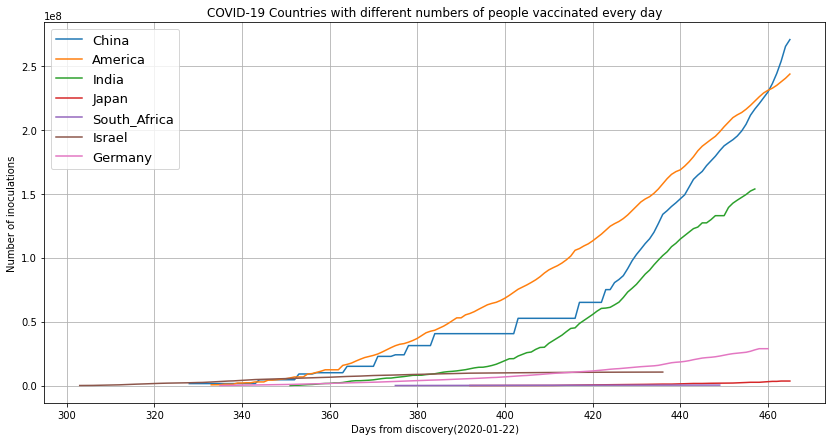

In [7]:
'''
各国疫苗接种
'''
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(China.index,China['total_vaccinations'],label='China')
ax.plot(America.index,America['total_vaccinations'],label='America')
ax.plot(India.index,India['total_vaccinations'],label='India')
ax.plot(Japan.index,Japan['total_vaccinations'],label='Japan')
ax.plot(South_Africa.index,South_Africa['total_vaccinations'],label='South_Africa')
ax.plot(Israel.index,Israel['total_vaccinations'],label='Israel')
ax.plot(Germany.index,Germany['total_vaccinations'],label='Germany')
ax.set_title("COVID-19 Countries with different numbers of people vaccinated every day")
ax.set_xlabel('Days from discovery(2020-01-22)')
ax.set_ylabel('Number of inoculations')
ax.legend(fontsize=13)
ax.grid(True)
plt.show()

In [8]:
'''
各国SIR模型的参数确定
'''

class estimationInfectionProb():
    def __init__(self, estUsedTimeIndexBox, nContact, gamma ,data):
        self.timeRange = np.array([i for i in range(estUsedTimeIndexBox[0], estUsedTimeIndexBox[1] + 1)])
        self.nContact, self.gamma ,self.data = nContact, gamma ,data
        self.dataStartTimeStep = 0

    def setInitSolution(self, x0):
        self.x0 = 0.04

    def costFunction(self, infectionProb):
        res = np.array(np.exp((infectionProb * self.nContact - self.gamma) * self.timeRange) - \
                       self.data.loc[self.timeRange - self.dataStartTimeStep, 'total_cases'])
        return (res ** 2).sum() / self.timeRange.size

    def optimize(self):
        self.solution = minimize(self.costFunction, self.x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': False})
        return self.getSolution()

    def getSolution(self):
        return self.solution.x

    def getBasicReproductionNumber(self):
        self.basicReproductionNumber = self.nContact * self.solution.x[0] / (self.gamma)
        print("basic reproduction number:", self.basicReproductionNumber)
        return self.basicReproductionNumber

def getBeta(start_time,end_time,data):
    gamma = 1 / 14
    # 计算beta
    startTime = datetime.datetime.strptime(start_time, "%Y-%m-%d")
    estUsedTimeBox = [datetime.datetime.strptime(start_time, "%Y-%m-%d"),datetime.datetime.strptime(end_time, "%Y-%m-%d")]
    estUsedTimeIndexBox = [(t - startTime).days for t in estUsedTimeBox]
    nContact, gamma = int(5), gamma
    estInfectionProb = estimationInfectionProb(estUsedTimeIndexBox, nContact, gamma ,data)
    estInfectionProb.setInitSolution(0.04)
    infectionProb = estInfectionProb.optimize()
    # SIR参数
    beta = float(infectionProb) * nContact
    σ = beta / gamma
    print("{}：beta={},gamma={},σ={}".format(data['location'][0],beta, gamma, σ))
    return beta,gamma,σ

Ls = ['America','China','India','Japan','South_Africa','Israel','Germany','World']

from collections import defaultdict
Result = defaultdict(list)
for i in Ls:
    Result[i].append(getBeta(eval(i)['date'][0],eval(i)['date'][max(eval(i).index)],eval(i)))

United States：beta=0.10990160785615419,gamma=0.07142857142857142,σ=1.5386225099861588
China：beta=0.09758689820766421,gamma=0.07142857142857142,σ=1.366216574907299
India：beta=0.10892801038920852,gamma=0.07142857142857142,σ=1.5249921454489193
Japan：beta=0.10100585177540754,gamma=0.07142857142857142,σ=1.4140819248557055
South Africa：beta=0.2,gamma=0.07142857142857142,σ=2.8000000000000003
Israel：beta=0.2,gamma=0.07142857142857142,σ=2.8000000000000003
Germany：beta=0.10521804258227324,gamma=0.07142857142857142,σ=1.4730525961518255
World：beta=0.11310077829286436,gamma=0.07142857142857142,σ=1.583410896100101


In [9]:
def SIR(sir, t, beta, gamma):
    S, I, R = sir
    dsdt = - beta * S * I
    didt = beta * S * I - gamma * I
    drdt = gamma * I
    return [dsdt, didt, drdt]

America:疫情结束的时间:2022-04-01 00:00:00,最终感染的人数:23176390,因为新冠疫情最终死亡的人数:4017901
China:疫情结束的时间:2022-04-01 00:00:00,最终感染的人数:57069956,因为新冠疫情最终死亡的人数:13887481
India:疫情结束的时间:2022-04-09 00:00:00,最终感染的人数:93206510,因为新冠疫情最终死亡的人数:16514557
Japan:疫情结束的时间:2022-04-01 00:00:00,最终感染的人数:6046303,因为新冠疫情最终死亡的人数:1316031
South_Africa:疫情结束的时间:2021-07-17 00:00:00,最终感染的人数:16311789,因为新冠疫情最终死亡的人数:1097181
Israel:疫情结束的时间:2021-07-15 00:00:00,最终感染的人数:2381307,因为新冠疫情最终死亡的人数:160124
Germany:疫情结束的时间:2022-04-06 00:00:00,最终感染的人数:4875250,因为新冠疫情最终死亡的人数:946064
World:疫情结束的时间:2022-04-01 00:00:00,最终感染的人数:609581790,因为新冠疫情最终死亡的人数:98669004


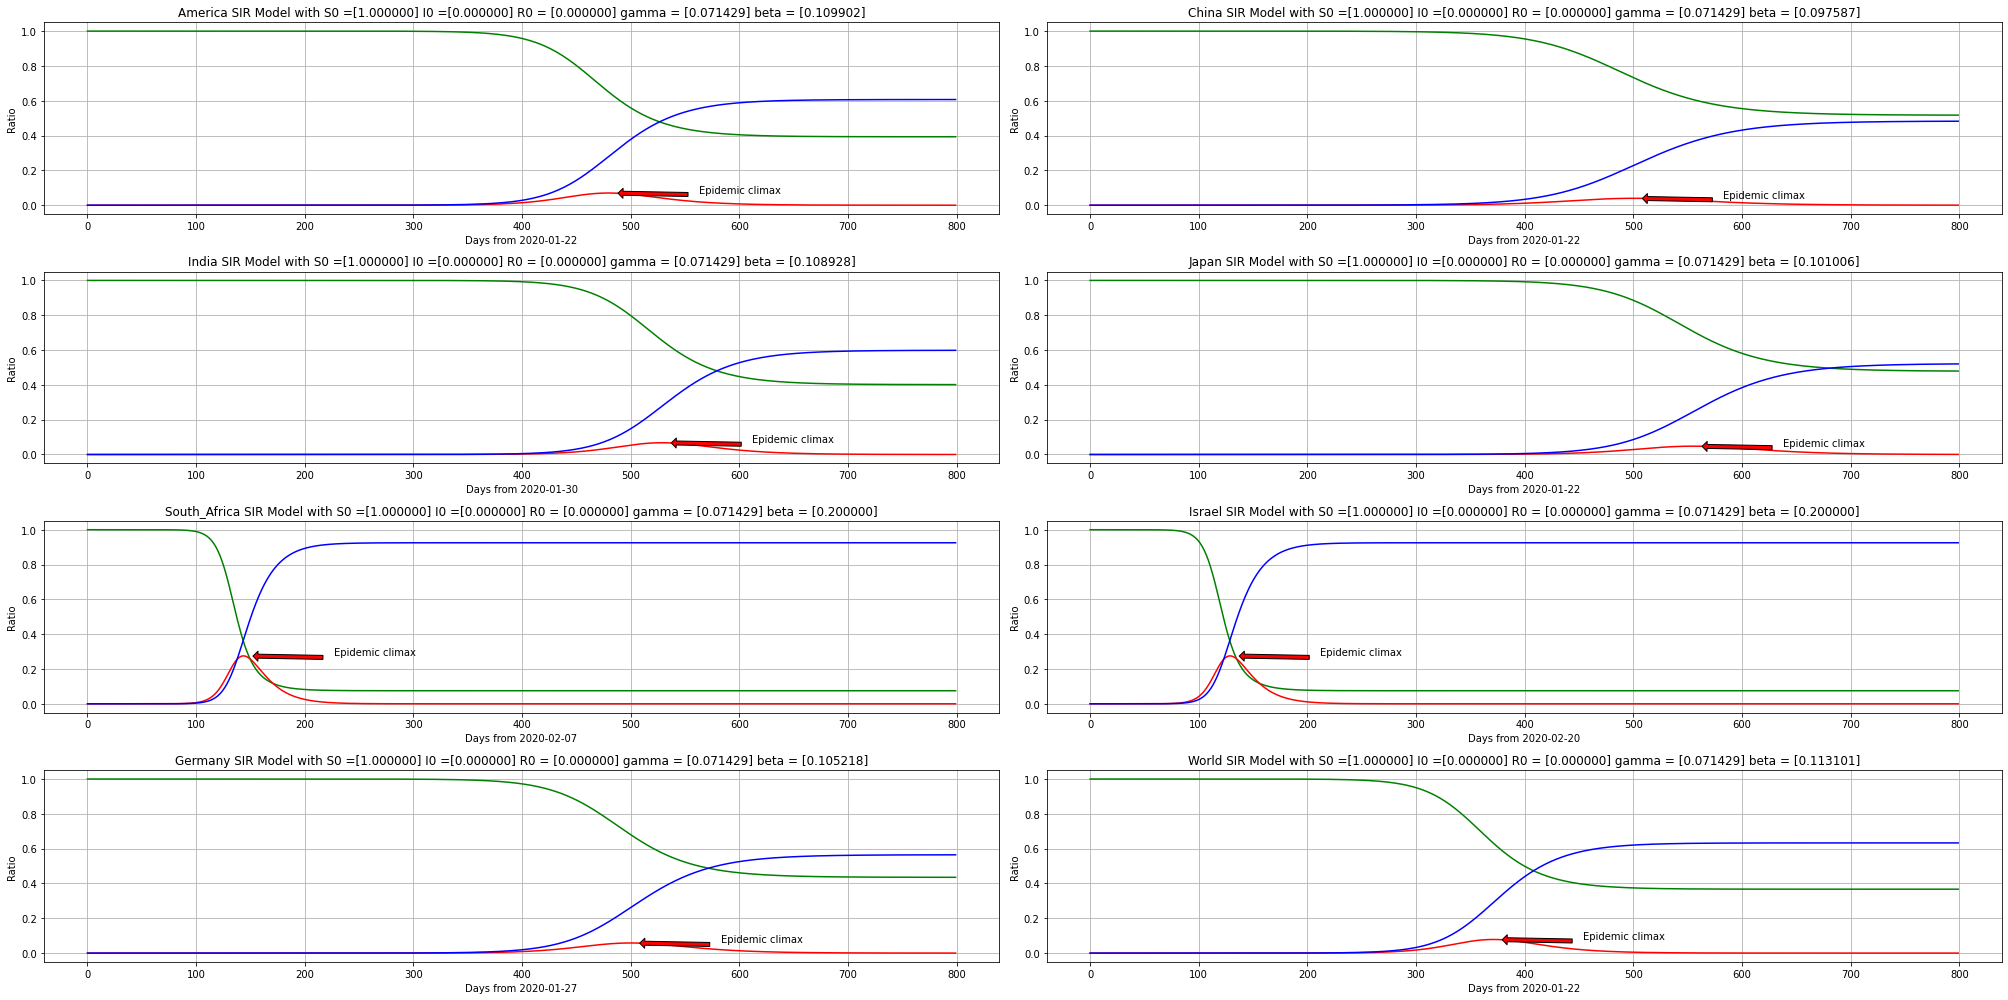

In [14]:
%matplotlib inline
j = 0
x,y = 0,0
fig, ax = plt.subplots(4,2,figsize=(28, 14))
for i in Ls:
    start_time = eval(i)['date'][0]
    end_time = eval(i)['date'][max(eval(i).index)]
    nContact, gamma = int(5), 1/14
    t = np.arange(0, 800)
    N = max(eval(i)['population'])
    R0 = min(eval(i)[eval(i)['total_deaths'] > 0]['total_deaths']) / N
    I0 = min(eval(i)[eval(i)['total_cases'] > 0]['total_cases']) / N
    S0 = 1 - R0 - I0
    beta = Result[i][0][0]
    died_cure_radio = 0.02
    result = odeint(SIR, [S0, I0, R0], t, args=(beta, gamma))
    St, It, Rt = result[:, 0], result[:, 1], result[:, 2]
    
    ax[x][y].plot(t, St, c="g", label="Ratio of susceptible population")
    ax[x][y].plot(t, It, c="r", label="Ratio of infected population")
    ax[x][y].plot(t, Rt, c="b", label="Ratio of people removed")
    ax[x][y].grid(True)
    ax[x][y].set_title(
        "{} SIR Model with S0 =[{:3f}] I0 =[{:3f}] R0 = [{:3f}] gamma = [{:2f}] beta = [{:2f}]".format(Ls[j],S0, I0, R0, gamma, beta))
    ax[x][y].set_xlabel('Days from {}'.format(start_time))
    ax[x][y].set_ylabel('Ratio'.format(start_time))
    need_day = datetime.timedelta(days=int(np.sum(It >= 0))).days
    over_Time = datetime.datetime.strptime(start_time, "%Y-%m-%d") + datetime.timedelta(days=int(np.sum(It >= 0)))
    max_infected_day = It.tolist().index(max(It))
    number_of_infected = int(np.ceil(np.max(It) * N))
    number_of_died = int(np.ceil(np.max(Rt) * N * died_cure_radio))
    ax[x][y].annotate('Epidemic climax', (max_infected_day, It[max_infected_day]), xytext=(90, 0.3),textcoords='offset points',arrowprops={
        'headwidth': 10,
        'headlength': 5,
        'width': 4,
        'facecolor': 'r',
        'shrink': 0.1,
    })
    print('{}:疫情结束的时间:{},最终感染的人数:{},因为新冠疫情最终死亡的人数:{}'.format(i,over_Time, number_of_infected, number_of_died))
    
    j+=1
    if x == 0 and y == 0:
        x,y = 0,1
    elif  x == 0 and y == 1:
        x,y = 1,0
    elif  x == 1 and y == 0:
        x,y = 1,1
    elif  x == 1 and y == 1:
        x,y = 2,0
    elif  x == 2 and y == 0:
        x,y = 2,1
    elif  x == 2 and y == 1:
        x,y = 3,0
    elif  x == 3 and y == 0:
        x,y = 3,1
plt.tight_layout()
plt.show()